## Focus
## Duke  University Spring 2019
### David Brady
Wednesday 30 January 2019

A version of the code provided in these notebooks is available at 
https://github.com/Aqueti/microcameraDevelopmentKit

This notebook explores remote access and focus/exposure control for a camera set up in the Chesterfield building for use in class. You should log into the chat room if you are actively using camera resources, announce what you are doing. 


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import skimage
import skimage.io as imio
import skimage.transform as trans
from skimage.viewer import ImageViewer
import glob
import re
from time import gmtime, strftime, sleep
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0) 

/Users/pabloortiz/anaconda/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


This notebook uses linux on windows bash commands to control and capture data from the camera. Use the username 'nvidia' to login to the camera, with password 'nvidia' Obviously, security is pretty lax, don't mess the camera up too much or you will mess up the class for a day or two while we reflash it's operating system. 

To send commands using rsh to the camera without a password you need to set up an ssh key on your computer and copy the key to the camera. Instructions for this are on the sakai site resources under the software and interfaces folder. You can test your ability to do this with the cell below. 

In [2]:
cmd="'rsh nvidia@10.236.176.38 ls'"
subprocess.run('bash -c '+cmd)

FileNotFoundError: [Errno 2] No such file or directory: "bash -c 'rsh nvidia@10.236.176.38 ls'": "bash -c 'rsh nvidia@10.236.176.38 ls'"

we can make the process of grabbing a frame from the camera into a function. In this command the sensor id, sid, can be either 1 or 0. To look at the effect of imres, review  nvgstcapture --help 

In [20]:
def grabImage(sid=1, imres=8):
    # I will use the file name dbGrab.... for the image grabbed from the camera. First step is to get rid of previously grabbed images
    subprocess.run('bash -c "rm dbGrab*"', \
                   stdout=subprocess.PIPE, shell=True)
    cmd1="""'rsh nvidia@10.236.176.38 "rm dbGrab*"'"""
    subprocess.run('bash -c '+cmd1, \
                   stdout=subprocess.PIPE, shell=True)
    # ok, now let's grab an image on the tegra
    cmD='rsh nvidia@10.236.176.38 "nvgstcapture-1.0 -m 1 --sensor-id '+str(sid)+' -A --capture-auto 1 \
--file-name dbGrab --image-res '+ str(imres)+'"'
    subprocess.run('bash -c '+"'"+cmD+"'", stdout=subprocess.PIPE, shell=True)
    subprocess.run('bash -c "rcp nvidia@10.236.176.38:dbGrab* ."', \
                   stdout=subprocess.PIPE, shell=True)
    #ok, now let's find the file name of the image we just grabbed and transfered 
    pop=subprocess.run('bash -c ls',stdout=subprocess.PIPE, shell=True)
    rePop=pop.stdout
    rePop=rePop.decode("utf-8")
    fileName = re.search(r'dbGrab(.*).jpg', rePop)
    fileName=fileName.group()
    pop=imio.imread(fileName)
    pop=skimage.transform.rotate(pop,180)
    return pop

In [21]:
pip=grabImage(sid=0)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


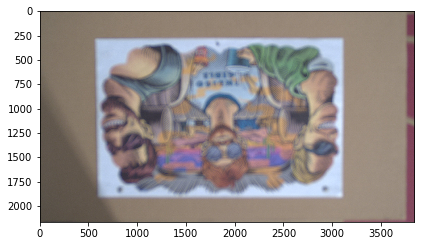

In [22]:
imio.imshow(pip)

In [23]:
pip=grabImage(sid=1, imres=3)

In [24]:
pip.shape

(720, 1280, 3)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


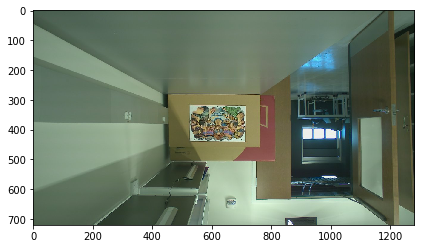

In [25]:
imio.imshow(pip)

The python program ~/bin/moveFocusMotor.py moves the focus of the camera

here is what you see if you try to run it on the tegra with no arguments

ubuntu@tegra-ubuntu:~/bin$ ./moveFocusMotor.py -h
address is 0
busnumber is <smbus.SMBus object at 0x7f982430b0>
im initializing here
['-h']
did not get enough arguments, must specify motor ID of 1 or 2 and number of steps
For example python moveFocusMotor.py 2 -50
ubuntu@tegra-ubuntu:~/bin$ 

let's make a function to move it a bit and then display the resulting image.

In this function allowed values of sid are also 0 and 1.


In [33]:
def moveFocus(sid=1, step=1):
    cmD='rsh nvidia@10.236.176.38 "python2 ~/bin/moveFocusMotor.py '+str(sid+1)+' '+str(step)+'"'
    pop=subprocess.run('bash -c '+ "'"+cmD+"'", stdout=subprocess.PIPE, shell=True)
    return pop.stdout
def resetFocus(sid=1):
    cmD='rsh nvidia@10.236.176.38 "python2 ~/bin/resetFocusMotor.py '+str(sid+1)+'"'
    pop=subprocess.run('bash -c '+"'"+cmD+"'", stdout=subprocess.PIPE, shell=True)
    return pop.stdout

In [31]:
a=moveFocus(sid=0,step=100)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


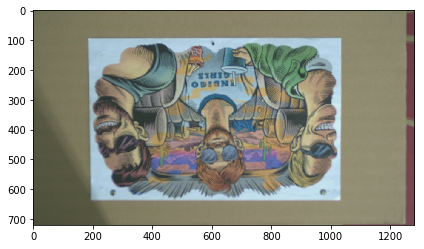

In [34]:

imio.imshow(grabImage(sid=0, imres=3))

Now let's work on finding the point of best focus. When moving the focus motors, be careful not to move too far. Move in steps of 100, don't move in one direction more than 1000 steps. If you have a linux machine, you can use the go.sh and recieve.sh scripts to monitor image quality in real time. If the focus motor becomes stuck you can use the reset script to restore it. 

In [37]:
import skimage
import skimage.io as imio
import skimage.transform as trans

Conventional autofocus algorithms work by maximizing some metric of focus goodness, such as how sharp the edges are in an image or what the total gradiant of the image is. The Laplacian filter looks at the total second derivative of the image, which is a scalar value that we might use to estimate the quality of the focus. 

In [39]:
def focusMetric(ss=0):
    pip=grabImage(sid=ss, imres=8)
    pop=np.sum(np.abs(skimage.filters.laplace(pip[:,:,1])))
    return pop

174275.27843132985


C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


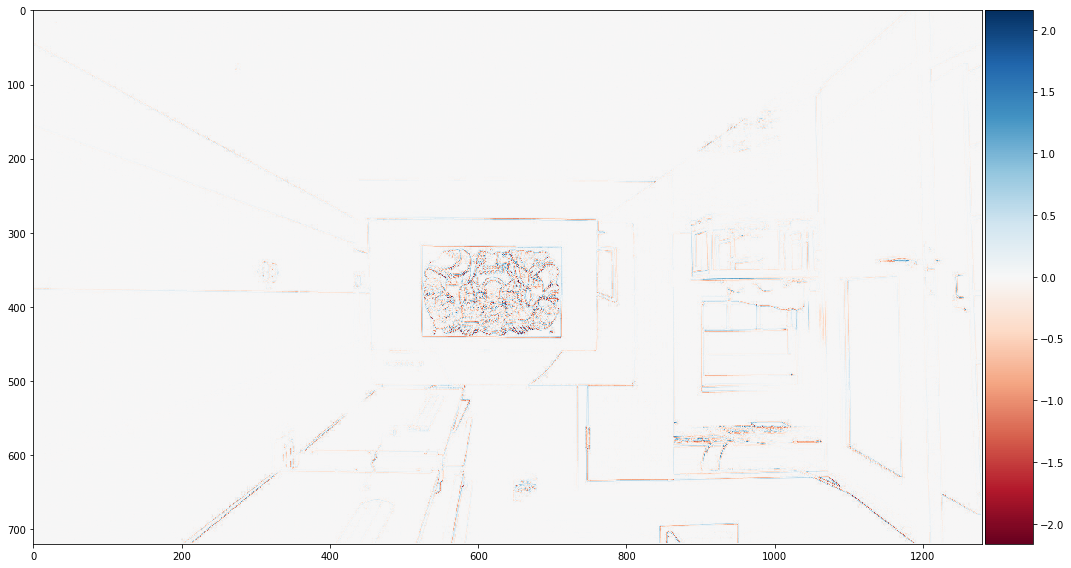

In [43]:
pip=grabImage(sid=1, imres=3)
print(focusMetric(ss=1))
pop=skimage.filters.laplace(pip[:,:,1])
imio.imshow(pop)

Summing value of the gradiant everywhere may not be a good metric of the quality of the focus. It might be better to threshold and look for the maxima.

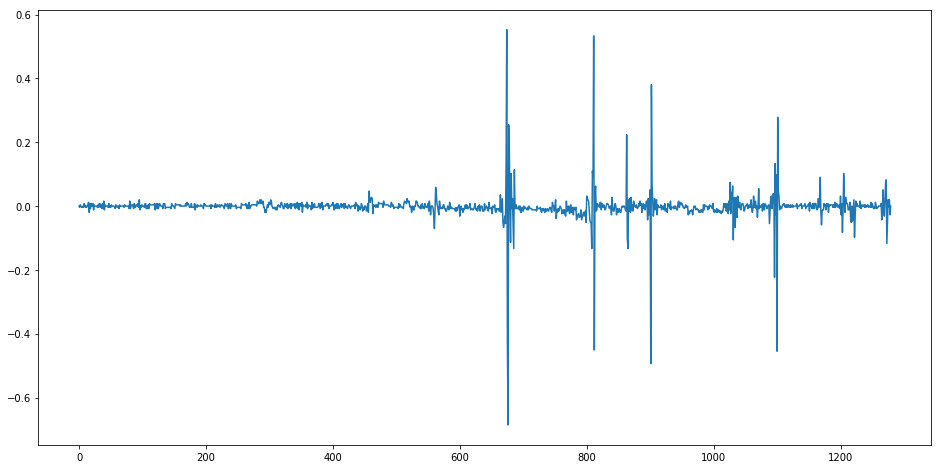

In [44]:
plt.plot(pop[500,:])

Different types of filters or edge features might be extracted to look at the quality of focus. It may also be a good idea to allow region of interest analysis. 

174159.0392156436


C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


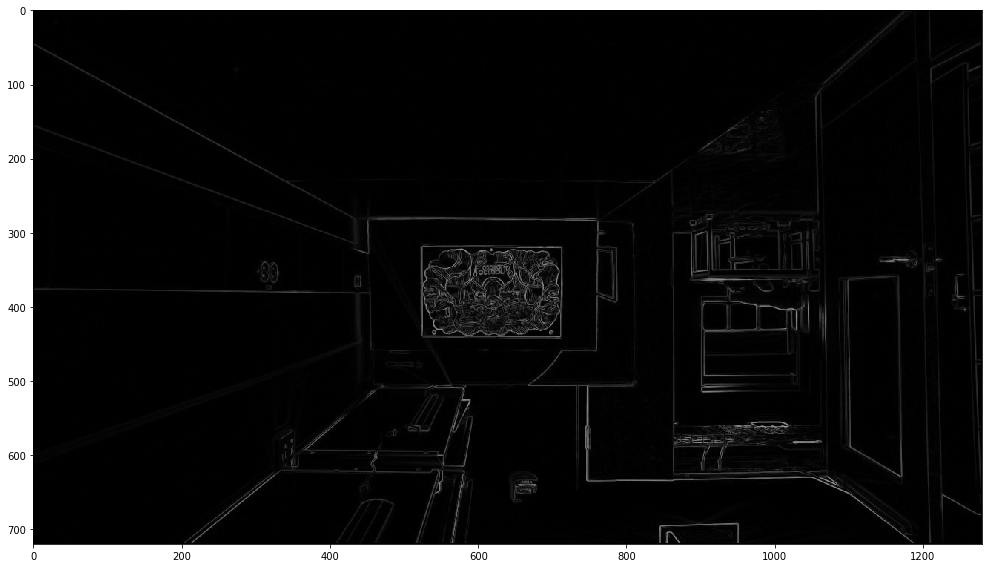

In [45]:
pip=grabImage(sid=1, imres=3)
print(focusMetric(ss=1))
pop=skimage.filters.sobel(pip[:,:,1])
imio.imshow(pop)

The Sobel filter is alother filter helpful in edge detection. https://en.wikipedia.org/wiki/Sobel_operator 

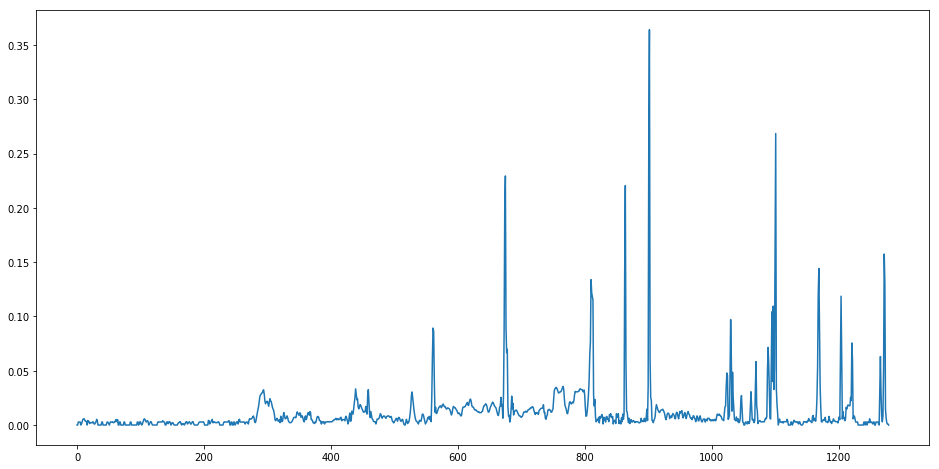

In [46]:
plt.plot(pop[500,:])

In [63]:
def focusMetricSobel(ss=0):
    pip=grabImage(sid=ss, imres=8)
    pop=np.sum(np.abs(skimage.filters.sobel(pip[:,:,1])))
    return [pop, pip]

In [82]:
ab=focusMetricSobel(ss=1)

In [83]:
ab[0]

119755.15618921845

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


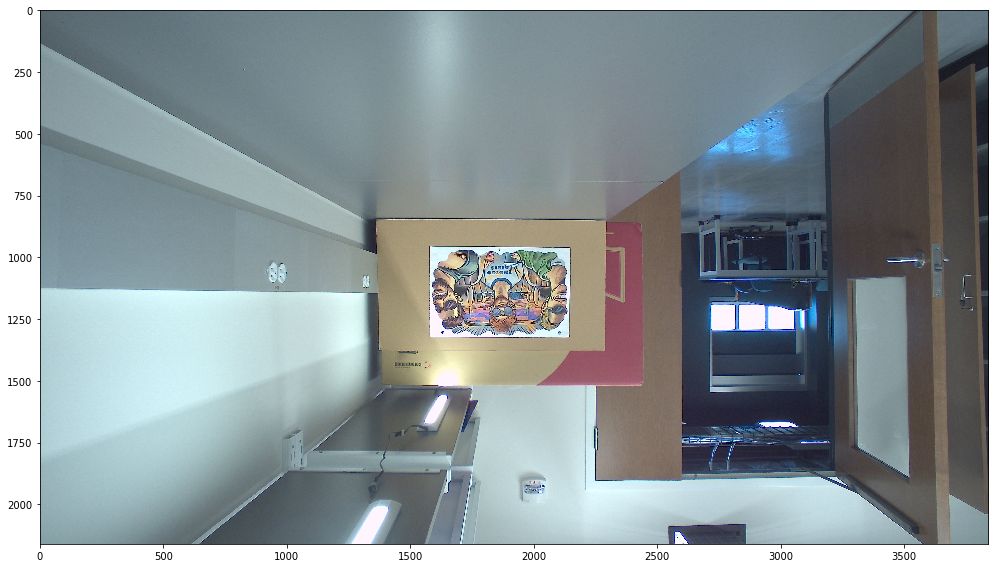

In [84]:
imio.imshow(ab[1])

In [81]:
resetFocus(sid=1)

b"address is 0\nbusnumber is <smbus.SMBus object at 0x7f7a3eb0b0>\nim initializing here\n['2']\nnow my address is 96\nnow my bus is 31\naddress is 96\nbusnumber is <smbus.SMBus object at 0x7f7a3eb170>\nim initializing here\ntrying to reset here\ntrying to build command here\n01010a0400\ndata part of command is [1, 1, 10, 4, 0]\nWidth        = 16\nPoly         = 0x1021\nReflectIn    = False\nXorIn        = 0x0000\nReflectOut   = False\nXorOut       = 0x0000\nAlgorithm    = UNDEFINED\n\ncrc is 216\nI think the full cmd should be [126, 215, 224, 1, 1, 10, 4, 0, 126]\nI2C: Writing list to register 0x60:\n[126, 215, 224, 1, 1, 10, 4, 0, 126]\n"

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


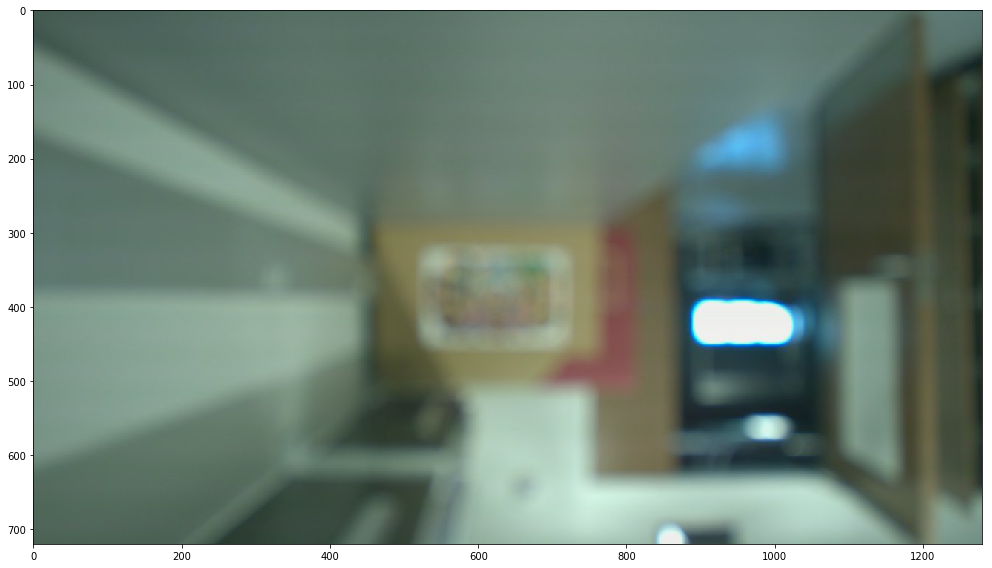

In [60]:
imio.imshow(grabImage(sid=1, imres=3))

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


82403.08122340014
81902.333249472
82313.36504376201
82347.58503167817
82087.55409838908
82273.52794744771
81957.09527581047
82458.49476280448
82301.91208406053
82283.46446991463
81619.79672120235
82412.02438622293
82441.32904208446
82468.12821695516
82476.66090610286
81983.50010667097
82381.98874356518
82484.63433613288
82421.16599652819


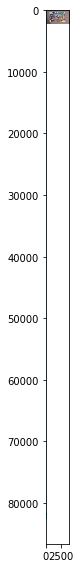

In [61]:
a=moveFocus(sid=1,step=-500)
pop=np.zeros(20)
pop[0]=focusMetricSobel()
print(pop[0])
for ctt in range(1,19):
    moveFocus(sid=1,step=50)
    pop[ctt]=focusMetricSobel()
    print(pop[ctt])
plt.plot(pop)


C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


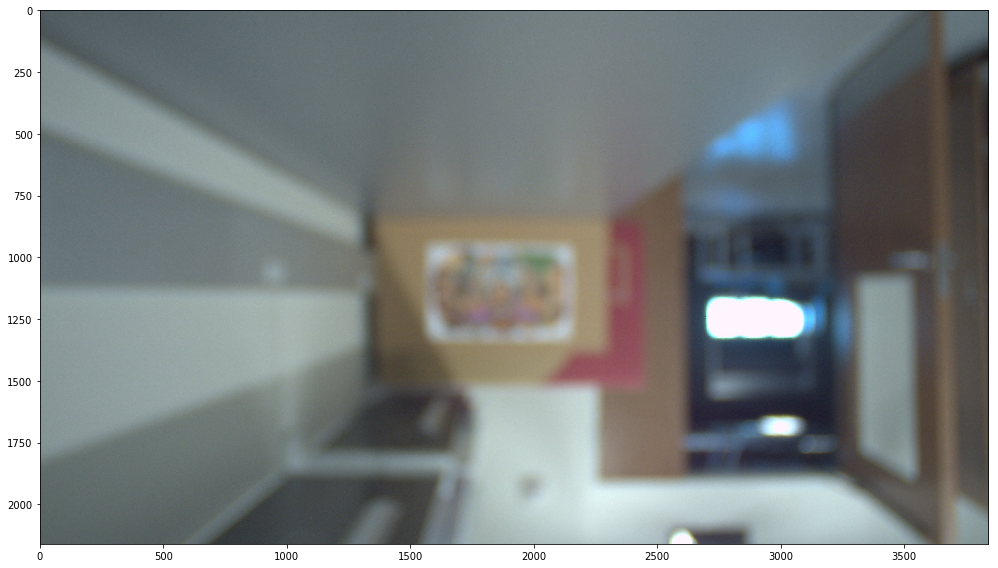

In [57]:
pap=focusMetricSobel(ss=1)

In [58]:
pap

57761.07170201915

rsh ubuntu@10.0.1.6 "python2 ~/bin/moveFocusMotor.py 1 -100"


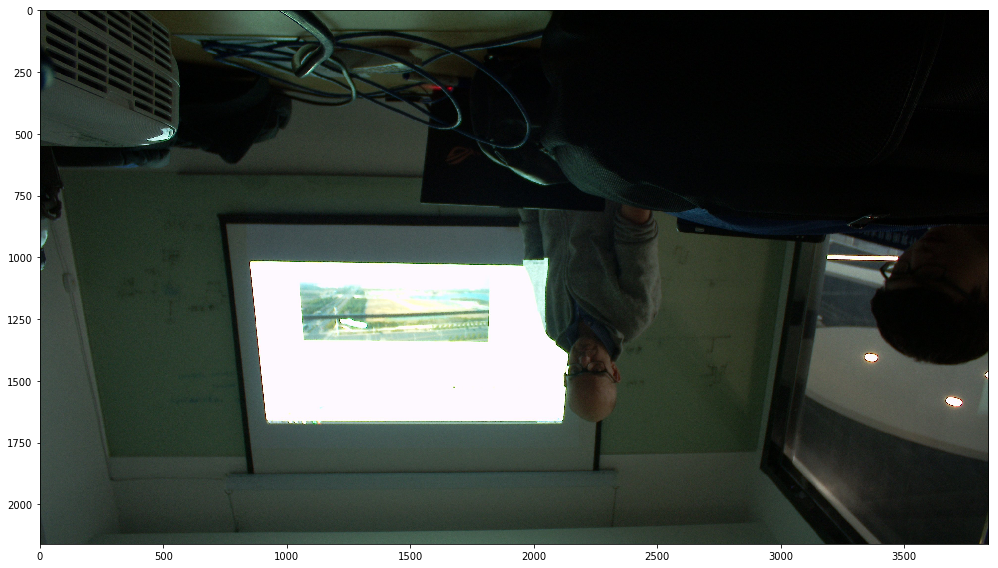

In [84]:
a=moveFocus(sid=1,step=-100)
pip=grabImage(sid=0, imres=8)
imio.imshow(pip)

In [35]:
def grabImageExpo(sid=1, imres=8, expoTime=0.500):
    # I will use the file name dbGrab.... for the image grabbed from the camera. First step is to get rid of previously grabbed images
    subprocess.run('bash -c "rm dbGrab*"', \
                   stdout=subprocess.PIPE, shell=True)
    cmd1="""'rsh nvidia@10.236.176.38 "rm dbGrab*"'"""
    subprocess.run('bash -c '+cmd1, \
                   stdout=subprocess.PIPE, shell=True)
    # ok, now let's grab an image on the tegra
    cmD='rsh nvidia@10.236.176.38 "nvgstcapture-1.0 -m 1 --sensor-id '+str(sid)+' -A --capture-auto 1 \
--file-name dbGrab --exposure-time='+str(expoTime)+ '--image-res '+ str(imres)+'"'
    subprocess.run('bash -c '+"'"+cmD+"'", stdout=subprocess.PIPE, shell=True)
    subprocess.run('bash -c "rcp nvidia@10.236.176.38:dbGrab* ."', \
                   stdout=subprocess.PIPE, shell=True)
    #ok, now let's find the file name of the image we just grabbed and transfered 
    pop=subprocess.run('bash -c ls',stdout=subprocess.PIPE, shell=True)
    rePop=pop.stdout
    rePop=rePop.decode("utf-8")
    fileName = re.search(r'dbGrab(.*).jpg', rePop)
    fileName=fileName.group()
    pop=imio.imread(fileName)
    pop=skimage.transform.rotate(pop,180)
    return pop

In [26]:
pop=grabImageExpo()

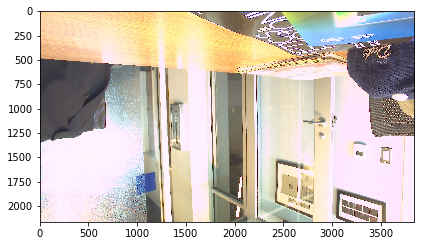

In [27]:
imio.imshow(pop)

In [28]:
pop=grabImageExpo(expoTime=0.10)

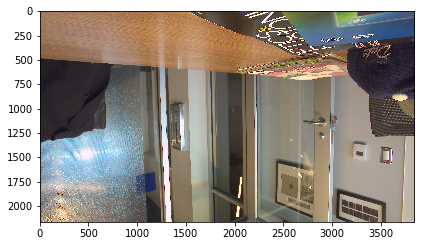

In [29]:
imio.imshow(pop)